# MLOP Assignment

In [3]:
!pip install openpyxl

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
import mlflow

In [5]:
df= pd.read_excel('01_residential_data.xlsx')
df

,block,street_name,town,postal_code,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,latitude,longitude,cbd_dist,min_dist_mrt
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176455,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,16 TO 18,93.0,Model A,2019,560000.0,1.447195,103.814008,18624.123340,702.591563
176456,362A,SEMBAWANG CRESCENT,SEMBAWANG,751362,2023-07,4 ROOM,04 TO 06,93.0,Model A,2019,550000.0,1.447195,103.814008,18624.123340,702.591563
176457,366B,SEMBAWANG CRESCENT,SEMBAWANG,752366,2023-07,4 ROOM,13 TO 15,93.0,Model A,2019,565000.0,1.443922,103.815957,18223.416060,727.108165
176458,992B,BUANGKOK LINK,HOUGANG,532992,2023-07,4 ROOM,07 TO 09,93.0,Model A,2019,598000.0,1.383827,103.881672,11650.037860,1278.633561


## Task 1 EDA

In [6]:
#Renaming columns

df= df.rename(columns={
    'month': 'transaction_month',
    'lease_commence_date': 'lease_start_year',
    'cbd_dist': 'distance_to_cbd',
    'min_dist_mrt': 'distance_to_mrt'
})

df.head()

,block,street_name,town,postal_code,transaction_month,flat_type,storey_range,floor_area_sqm,flat_model,lease_start_year,resale_price,latitude,longitude,distance_to_cbd,distance_to_mrt
0,541,ANG MO KIO AVENUE 10,ANG MO KIO,560541,2016-01,3 ROOM,04 TO 06,68.0,New Generation,1981,342000.0,1.373922,103.855621,10065.227930,847.235690
1,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,327000.0,1.361343,103.851699,8662.831360,928.311457
2,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,3 ROOM,01 TO 03,67.0,New Generation,1980,280000.0,1.370816,103.859192,9749.916281,1094.432471
3,560,ANG MO KIO AVENUE 10,ANG MO KIO,560560,2016-01,4 ROOM,07 TO 09,92.0,New Generation,1980,425000.0,1.370816,103.859192,9749.916281,1094.432471
4,331,ANG MO KIO AVENUE 1,ANG MO KIO,560331,2016-01,3 ROOM,10 TO 12,68.0,New Generation,1981,338000.0,1.362111,103.850767,8747.934242,822.147955


I renamed some of the columns so that it is easier to understand some of the columns. For example, cbd_dist and min_dis_mrt which just means distance to cbd and distance to mrt. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176460 entries, 0 to 176459
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   block              176460 non-null  object 
 1   street_name        176460 non-null  object 
 2   town               176460 non-null  object 
 3   postal_code        176460 non-null  int64  
 4   transaction_month  176460 non-null  object 
 5   flat_type          176460 non-null  object 
 6   storey_range       176460 non-null  object 
 7   floor_area_sqm     176460 non-null  float64
 8   flat_model         176460 non-null  object 
 9   lease_start_year   176460 non-null  int64  
 10  resale_price       176460 non-null  float64
 11  latitude           176460 non-null  float64
 12  longitude          176460 non-null  float64
 13  distance_to_cbd    176460 non-null  float64
 14  distance_to_mrt    176460 non-null  float64
dtypes: float64(6), int64(2), object(7)
memory usage: 20

In [8]:
df.describe()

,postal_code,floor_area_sqm,lease_start_year,resale_price,latitude,longitude,distance_to_cbd,distance_to_mrt
count,176460.000000,176460.000000,176460.000000,1.764600e+05,176460.000000,176460.000000,176460.000000,176460.000000
mean,560887.598725,97.449497,1995.223195,4.793598e+05,1.367588,103.841673,12427.507031,831.510563
std,190775.524205,24.049168,13.628932,1.651672e+05,0.042726,0.071216,4395.808395,464.516793
min,50004.000000,31.000000,1966.000000,1.400000e+05,1.270380,103.644248,592.121638,36.079525
25%,510187.000000,82.000000,1985.000000,3.600000e+05,1.336960,103.781229,9681.902128,475.328602
50%,560565.000000,94.000000,1996.000000,4.480000e+05,1.367409,103.846488,13343.661050,744.891776
75%,730149.000000,112.000000,2005.000000,5.680000e+05,1.395796,103.899484,15446.806430,1105.154334
max,825195.000000,259.000000,2019.000000,1.500000e+06,1.457071,103.987804,23298.462280,3496.402761


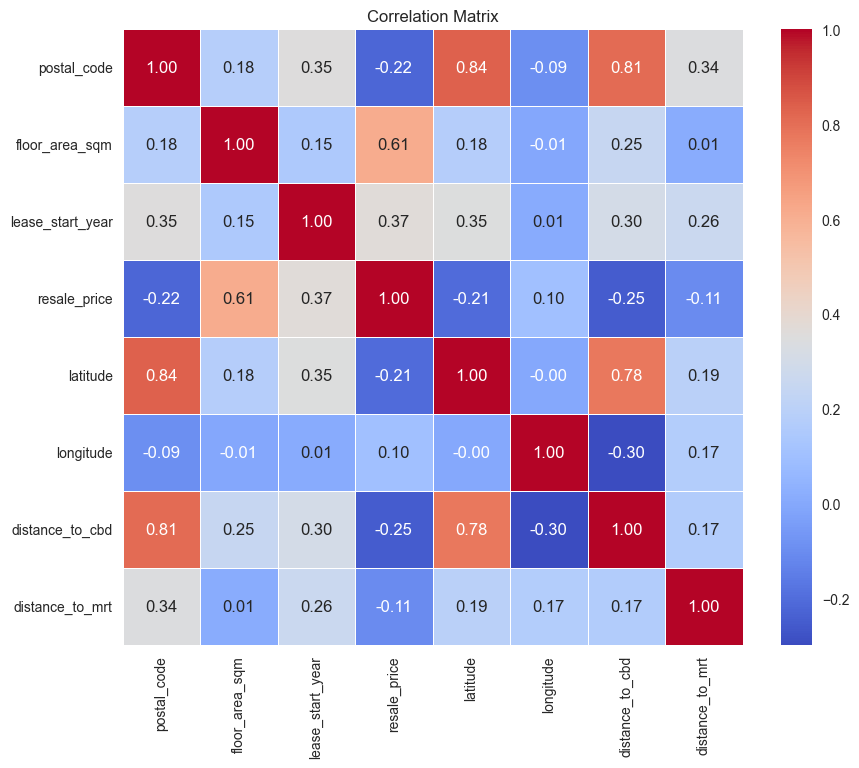

resale_price        1.000000
floor_area_sqm      0.609362
lease_start_year    0.367487
longitude           0.097843
distance_to_mrt    -0.105020
latitude           -0.206062
postal_code        -0.221042
distance_to_cbd    -0.251624
Name: resale_price, dtype: float64

In [9]:
numeric_data = df.select_dtypes(include=['number'])
correlation = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

correlation_summary = correlation['resale_price'].sort_values(ascending=False)
correlation_summary

The resale price is most influenced by the size of the flat and its age.

In [10]:
df.isna().sum()

block                0
street_name          0
town                 0
postal_code          0
transaction_month    0
flat_type            0
storey_range         0
floor_area_sqm       0
flat_model           0
lease_start_year     0
resale_price         0
latitude             0
longitude            0
distance_to_cbd      0
distance_to_mrt      0
dtype: int64

In [11]:
df.duplicated().sum()

349

In [12]:
duplicate_rows= df[df.duplicated()]

duplicate_rows

,block,street_name,town,postal_code,transaction_month,flat_type,storey_range,floor_area_sqm,flat_model,lease_start_year,resale_price,latitude,longitude,distance_to_cbd,distance_to_mrt
688,450,CLEMENTI AVENUE 3,CLEMENTI,120450,2016-01,3 ROOM,04 TO 06,82.0,New Generation,1980,410000.0,1.313448,103.765484,10126.64744,187.311456
957,436A,FERNVALE ROAD,SENGKANG,791436,2016-01,4 ROOM,13 TO 15,96.0,Model A,2010,455000.0,1.392726,103.876507,12453.05966,2115.045830
1872,467,ADMIRALTY DRIVE,SEMBAWANG,750467,2016-02,4 ROOM,07 TO 09,102.0,Premium Apartment,2001,365000.0,1.452227,103.814426,19156.90996,717.283030
2482,333,ANG MO KIO AVENUE 1,ANG MO KIO,560333,2016-03,3 ROOM,04 TO 06,68.0,New Generation,1981,340000.0,1.361343,103.851699,8662.83136,928.311457
4988,830,TAMPINES STREET 82,TAMPINES,520830,2016-04,3 ROOM,01 TO 03,70.0,Simplified,1986,315000.0,1.349842,103.934818,11875.14347,619.502715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169842,28,MARSILING DRIVE,WOODLANDS,730028,2023-04,4 ROOM,07 TO 09,97.0,New Generation,1977,395000.0,1.442791,103.773707,19666.11916,1136.324402
171438,449B,BUKIT BATOK WEST AVENUE 9,BUKIT BATOK,652449,2023-04,4 ROOM,07 TO 09,93.0,Model A,2019,620000.0,1.351979,103.741081,14444.29917,987.033105
172390,7,MARSILING DRIVE,WOODLANDS,730007,2023-05,4 ROOM,04 TO 06,88.0,Improved,1976,360000.0,1.441669,103.776733,19408.34179,1053.916129
174079,92,BEDOK NORTH AVENUE 4,BEDOK,460092,2023-06,3 ROOM,01 TO 03,67.0,New Generation,1979,350000.0,1.332444,103.941298,11410.96563,806.929986


Even though there are duplicates, I am not going to remove them in my preprocessing because I think that the duplicates can show the difference in the resale price. For example, if it is the same exact block with the same flat_type but the only difference is the storey_range, the resale price will be different.

In [13]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'PASIR RIS', 'PUNGGOL', 'QUEENSTOWN',
       'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH',
       'WOODLANDS', 'YISHUN', 'MARINE PARADE', 'BUKIT TIMAH'],
      dtype=object)

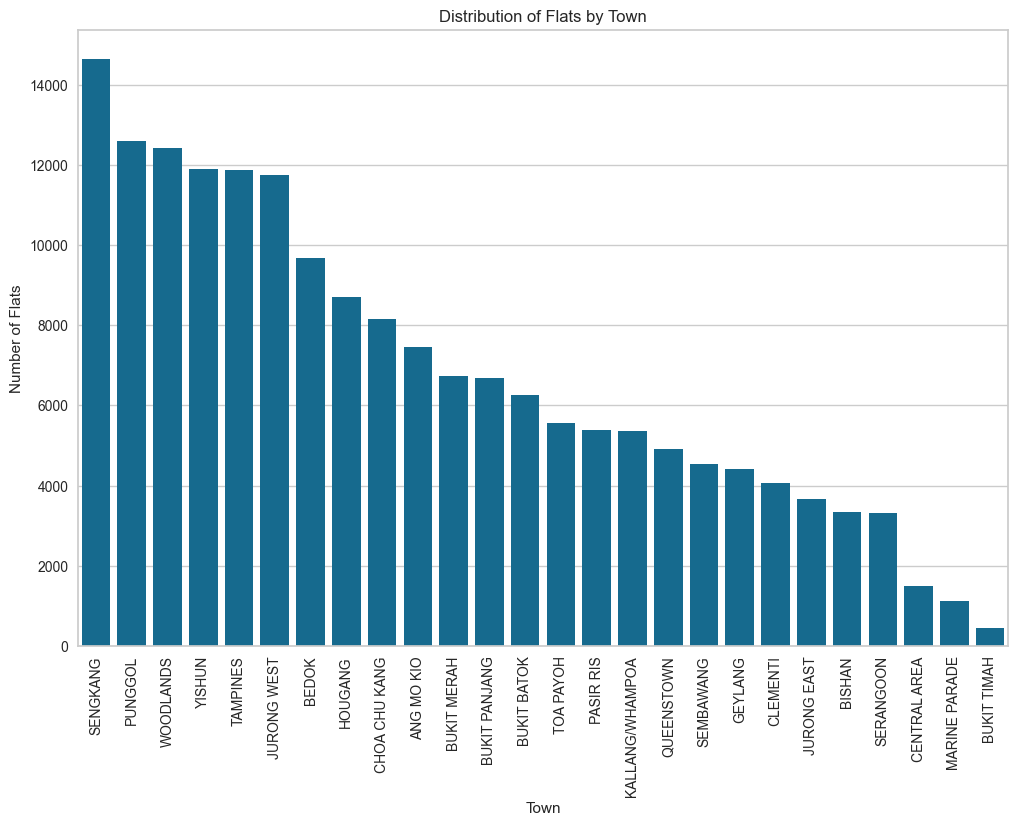

In [14]:
plt.figure(figsize=(12, 8))
town_counts = df['town'].value_counts()
sns.barplot(x=town_counts.index, y=town_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Flats by Town')
plt.xlabel('Town')
plt.ylabel('Number of Flats')
plt.show()

Most flats were purchased either North or North-East region of Singapore. Not much were purchased around the central area maybe because of high price.

In [15]:
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

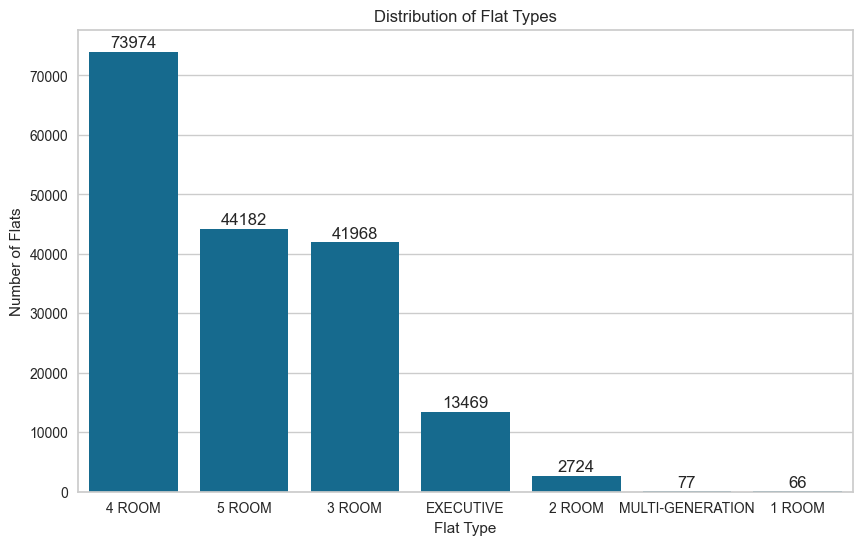

In [17]:
flat_type_distribution= df['flat_type'].value_counts()
# Creating a bar chart with the values annotated on top of each bar
plt.figure(figsize=(10, 6))
sns.barplot(x=flat_type_distribution.index, y=flat_type_distribution.values)
plt.title('Distribution of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Number of Flats')

# Adding the values on top of each bar
for index, value in enumerate(flat_type_distribution.values):
    plt.text(index, value + 200, str(value), ha='center', va='bottom')

plt.show()


Most Singaporeans buy a 4 room flat as most families only have 2 parents and 1 or 2 children in the household. 3 and 5 room flat are also very common as well. For 1 room flat, usually purchased by elderlies as they are most likely retired and do not need much space. 

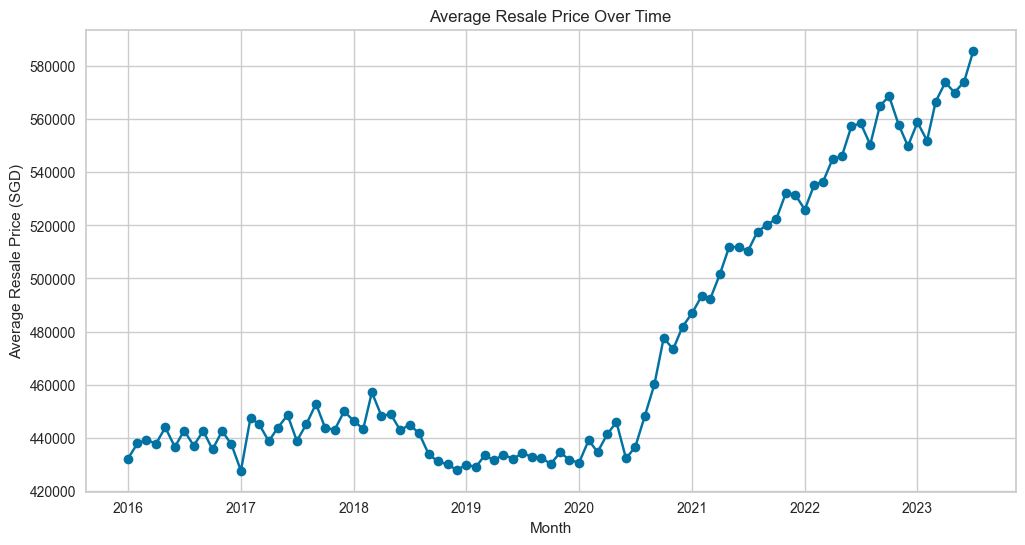

In [18]:
df['transaction_month'] = pd.to_datetime(df['transaction_month'])

# Group by month and calculate the average resale price
monthly_trend = df.groupby('transaction_month')['resale_price'].mean()

# Plotting the trend of average resale price over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o')
plt.title('Average Resale Price Over Time')
plt.xlabel('Month')
plt.ylabel('Average Resale Price (SGD)')
plt.grid(True)
plt.show()


As time goes by, we can see that the average resale price has increase a lot. But during 2019 and 2020, there is a drop in the trend which means that not many people were selling or buying houses during that period. And also 2020 was when COVID-19 happen which also affects the trend. Post-COVID, prices increase tremendously also maybe because of the increase of GST.

## Task 2 

In [26]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("hdb_resale_experiment")

reg_setup = setup(
    data=df, 
    target='resale_price',  # Target variable
    session_id=123,  # For reproducibility
    normalize=True,  # Normalization
    transformation=False,  # Disable transformations
    polynomial_features=True,  # Generate polynomial features
    bin_numeric_features=['floor_area_sqm'],  # Binning continuous features
    log_experiment=True,  # Enable MLFlow logging
    experiment_name='hdb_resale_experiment',  # Name of the experiment in MLFlow
    use_gpu= True
)


2024/08/20 11:53:44 INFO mlflow.tracking.fluent: Experiment with name 'hdb_resale_experiment' does not exist. Creating a new experiment.


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

,Description,Value
0,Session id,123
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(176460, 15)"
4,Transformed data shape,"(176460, 1770)"
5,Transformed train set shape,"(123521, 1770)"
6,Transformed test set shape,"(52939, 1770)"
7,Numeric features,7
8,Date features,1
9,Categorical features,6


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are n

In [27]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,19992.8641,749475510.3602,27375.0700,0.9725,0.0564,0.0429,17.4410
et,Extra Trees Regressor,19637.4795,769763606.1372,27742.7057,0.9717,0.0557,0.0416,196.6780
rf,Random Forest Regressor,20111.6325,827253968.4866,28760.8005,0.9696,0.0567,0.0424,208.1050
xgboost,Extreme Gradient Boosting,21153.6619,847200595.2000,29105.8832,0.9689,0.0590,0.0450,25.0310
lightgbm,Light Gradient Boosting Machine,22357.6357,940134331.8098,30659.4285,0.9655,0.0622,0.0477,20.4000
dt,Decision Tree Regressor,28131.3088,1654190601.8373,40669.7498,0.9393,0.0800,0.0591,32.5320
gbr,Gradient Boosting Regressor,31612.3306,1897480704.1431,43558.5228,0.9303,0.0860,0.0667,350.0900
knn,K Neighbors Regressor,34926.3578,2418658636.8000,49173.9598,0.9112,0.0953,0.0724,34.4750
ridge,Ridge Regression,38307.7806,2488724960.5487,49880.0170,0.9086,0.1063,0.0842,13.1390
lasso,Lasso Regression,40326.1864,2730127976.9016,52247.1836,0.8998,0.1133,0.0889,283.8200


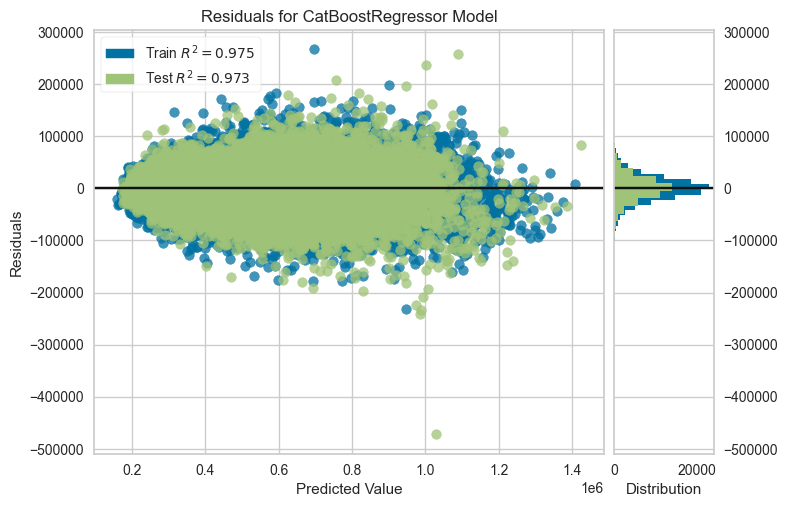

In [28]:
plot_model(best_model, plot='residuals')

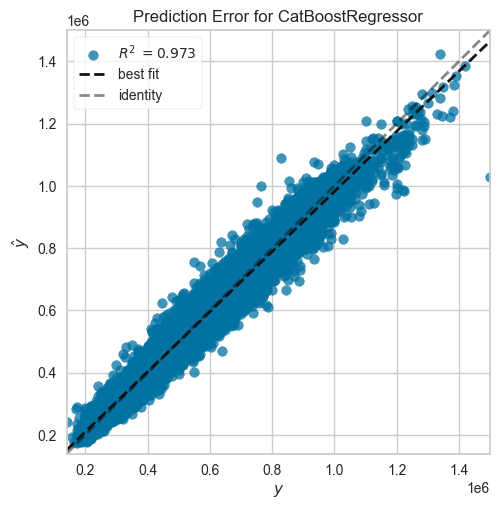

In [29]:
plot_model(best_model, plot='error')

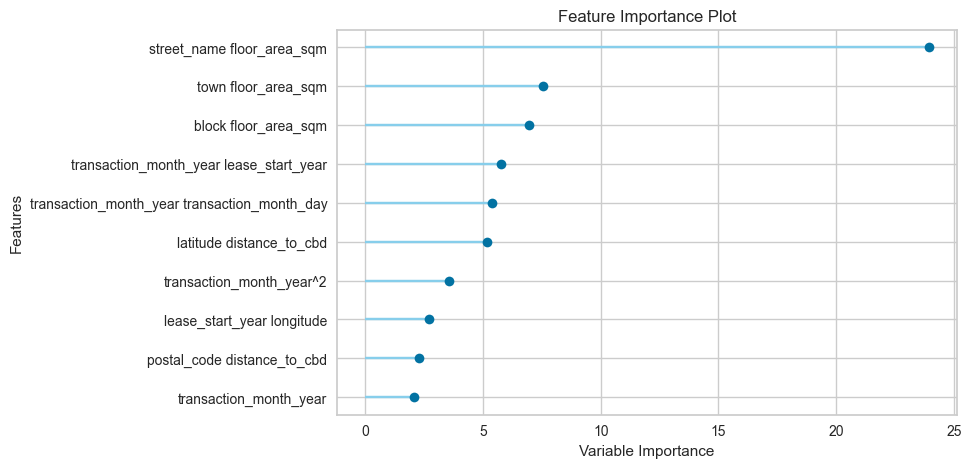

In [30]:
plot_model(best_model, plot='feature')

In [31]:
final_model = finalize_model(best_model)

predictions = predict_model(final_model, df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,19084.4202,668197406.0557,25849.5146,0.9755,0.0542,0.0412


In [32]:
save_model(final_model, 'hdb_resale_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['transaction_month'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['postal_code', 'floor_area_sqm',
                                              'lease_start_year', 'latitude',
                                              'longitude', 'distance_to_cbd',
                                              'distance_to_mrt'],
                                     transformer=SimpleImputer())),
                 (...
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['floor_area_sqm'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                          

In [5]:
mlflow.register_model(
    "runs:/110b3b5d28c345b397d1165dbd005218/model",
    "hdb_resale_model"
)

Registered model 'hdb_resale_model' already exists. Creating a new version of this model...


MlflowException: Run '110b3b5d28c345b397d1165dbd005218' not found

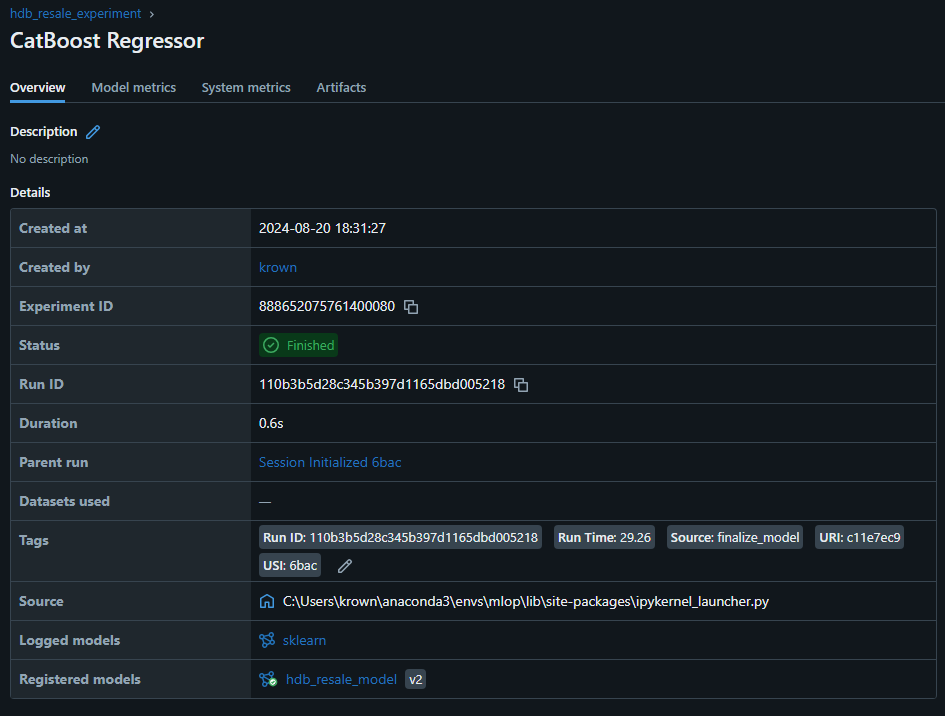